# TFM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 500)

In [3]:
datos1 = pd.read_csv("/home/michael/Kschool/TFM/Importe_Taxi/2018_Green_Taxi_Trip_Data.csv")

In [4]:
datos1.shape

(8807303, 19)

# Extrayendo muestra

In [5]:
datos1["key"] = range(datos1.shape[0])

In [6]:
from random import sample
total = list(datos1["key"])
muestra = sample(total,round(datos1.shape[0]*0.1))

In [7]:
datos_sample = datos1.loc[muestra]

In [8]:
datos_sample.shape

(880730, 20)

In [9]:
#datos_sample.to_csv("/home/michael/Kschool/TFM/Importe_Taxi/datos_TFM.csv",index = False)

# Limpiando datos

In [10]:
datos_sample["lpep_pickup_datetime"] = pd.to_datetime(datos_sample["lpep_pickup_datetime"])
datos_sample["lpep_dropoff_datetime"] = pd.to_datetime(datos_sample["lpep_dropoff_datetime"])

In [11]:
datos_sample["dayofweek"] = datos_sample["lpep_pickup_datetime"].dt.dayofweek

In [12]:
datos_sample["dayofmonth"] = datos_sample["lpep_pickup_datetime"].dt.day

In [13]:
datos_sample["month"] = datos_sample["lpep_pickup_datetime"].dt.month

In [14]:
datos_sample["hora_pickup"] = datos_sample["lpep_pickup_datetime"].dt.hour * 3600
datos_sample["minute_pickup"] = datos_sample["lpep_pickup_datetime"].dt.minute * 60
datos_sample["second_pickup"] = datos_sample["lpep_pickup_datetime"].dt.second

datos_sample["hora_dropoff"] = datos_sample["lpep_dropoff_datetime"].dt.hour * 3600
datos_sample["minute_dropoff"] = datos_sample["lpep_dropoff_datetime"].dt.minute * 60
datos_sample["second_dropoff"] = datos_sample["lpep_dropoff_datetime"].dt.second

In [15]:
datos_sample["time_pickup"] = datos_sample["hora_pickup"] + datos_sample["minute_pickup"] + datos_sample["second_pickup"]
datos_sample["time_dropoff"] = datos_sample["hora_dropoff"] + datos_sample["minute_dropoff"] + datos_sample["second_dropoff"]

In [16]:
datos_sample["time_duration"] = datos_sample["time_dropoff"] - datos_sample["time_pickup"]

In [17]:
datos_sample["hora_pickup"] = datos_sample["hora_pickup"] / 3600

In [18]:
flag = []
for value in datos_sample["store_and_fwd_flag"]:
    if value == "N":
        flag.append(0)
    else:
        flag.append(1)

datos_sample["store_and_fwd_flag"] = flag

In [19]:
datos_sample["time_duration"].describe()

count    880730.000000
mean        246.786745
std        7391.561604
min      -86392.000000
25%         378.000000
50%         651.000000
75%        1118.000000
max       86028.000000
Name: time_duration, dtype: float64

(array([6.18000e+03, 3.21000e+02, 2.10000e+02, 1.35000e+02, 3.85400e+03,
        8.69921e+05, 2.60000e+01, 3.00000e+00, 1.00000e+00, 7.90000e+01]),
 array([-86392., -69150., -51908., -34666., -17424.,   -182.,  17060.,
         34302.,  51544.,  68786.,  86028.]),
 <a list of 10 Patch objects>)

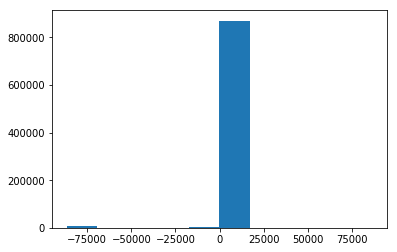

In [20]:
plt.hist(datos_sample["time_duration"])

In [21]:
datos_sample = datos_sample[datos_sample["time_duration"] > 0]

(array([2.30800e+03, 3.78300e+03, 4.81000e+03, 1.91400e+04, 2.10513e+05,
        4.33701e+05, 1.81527e+05, 1.34250e+04, 8.10000e+01, 8.70000e+01]),
 array([ 0.69314718,  1.76007644,  2.82700569,  3.89393494,  4.9608642 ,
         6.02779345,  7.09472271,  8.16165196,  9.22858122, 10.29551047,
        11.36243973]),
 <a list of 10 Patch objects>)

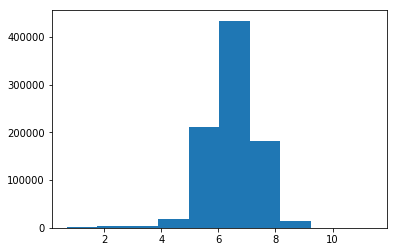

In [22]:
plt.hist(np.log1p(datos_sample["time_duration"]))

In [23]:
datos_sample = datos_sample[datos_sample["time_duration"] > 180]

(array([5.06274e+05, 1.91808e+05, 6.71600e+04, 2.74230e+04, 1.23600e+04,
        5.80000e+03, 2.77300e+03, 1.25300e+03, 5.42000e+02, 2.30000e+02]),
 array([ 181. ,  882.6, 1584.2, 2285.8, 2987.4, 3689. , 4390.6, 5092.2,
        5793.8, 6495.4, 7197. ]),
 <a list of 10 Patch objects>)

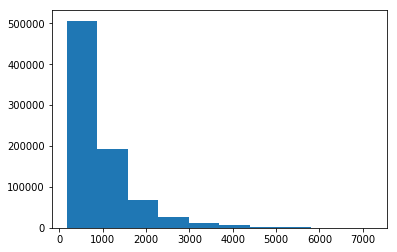

In [329]:
plt.hist((datos_sample["time_duration"]))

In [328]:
datos_sample = datos_sample[datos_sample["time_duration"] <= 7200]

In [330]:
datos_sample["time_duration"].describe()

count    815623.000000
mean        937.922978
std         767.018879
min         181.000000
25%         431.000000
50%         699.000000
75%        1170.000000
max        7197.000000
Name: time_duration, dtype: float64

In [331]:
VendorID = datos_sample.groupby("VendorID")["key"].count().reset_index()
VendorID.columns = ["VendorID","Cantidad"]
VendorID["VendorID"] = VendorID["VendorID"].replace(1,"Tipo_1")
VendorID["VendorID"] = VendorID["VendorID"].replace(2,"Tipo_2")

In [332]:
VendorID

,VendorID,Cantidad
0,Tipo_1,130827
1,Tipo_2,684796


<BarContainer object of 2 artists>

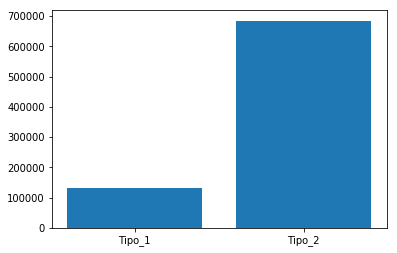

In [333]:
plt.bar(VendorID["VendorID"],VendorID["Cantidad"])

In [334]:
StoreFwdFlag = datos_sample.groupby("store_and_fwd_flag")["key"].count().reset_index()
StoreFwdFlag.columns = ["store_and_fwd_flag","Cantidad"]
StoreFwdFlag["store_and_fwd_flag"] = StoreFwdFlag["store_and_fwd_flag"].replace(0,"N")
StoreFwdFlag["store_and_fwd_flag"] = StoreFwdFlag["store_and_fwd_flag"].replace(1,"Y")

In [335]:
StoreFwdFlag

,store_and_fwd_flag,Cantidad
0,N,814260
1,Y,1363


<BarContainer object of 2 artists>

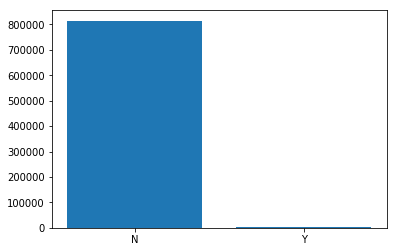

In [336]:
plt.bar(StoreFwdFlag["store_and_fwd_flag"],StoreFwdFlag["Cantidad"])

In [337]:
datos_sample = datos_sample[datos_sample["RatecodeID"] != 99]

In [338]:
RateCodeID = datos_sample.groupby("RatecodeID")["key"].count().reset_index()
RateCodeID.columns = ["RatecodeID","Cantidad"]
RateCodeID["RatecodeID"] = RateCodeID["RatecodeID"].replace(1,"Tasa Estandar")
RateCodeID["RatecodeID"] = RateCodeID["RatecodeID"].replace(2,"JFK")
RateCodeID["RatecodeID"] = RateCodeID["RatecodeID"].replace(3,"Newark")
RateCodeID["RatecodeID"] = RateCodeID["RatecodeID"].replace(4,"Nassau o Westchester")
RateCodeID["RatecodeID"] = RateCodeID["RatecodeID"].replace(5,"Tarifa Negociada")
RateCodeID["RatecodeID"] = RateCodeID["RatecodeID"].replace(6,"Viaje Grupo")

In [339]:
RateCodeID

,RatecodeID,Cantidad
0,Tasa Estandar,795429
1,JFK,1174
2,Newark,252
3,Nassau o Westchester,552
4,Tarifa Negociada,18216


<BarContainer object of 5 artists>

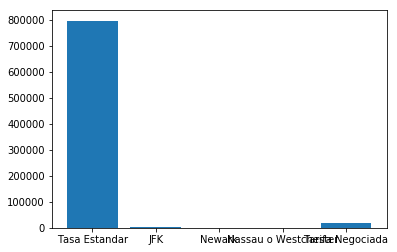

In [340]:
plt.bar(RateCodeID["RatecodeID"],RateCodeID["Cantidad"])

In [341]:
Pasenger = datos_sample.groupby("passenger_count")["key"].count().reset_index()
Pasenger.columns = ["passenger_count","Cantidad"]

In [342]:
Pasenger

,passenger_count,Cantidad
0,0,1108
1,1,691130
2,2,63137
3,3,13104
4,4,4665
5,5,27728
6,6,14740
7,7,5
8,8,5
9,9,1


<BarContainer object of 10 artists>

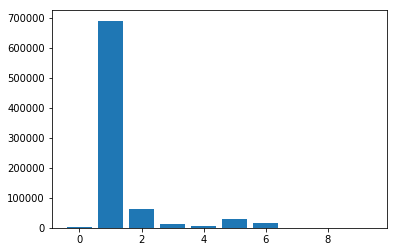

In [343]:
plt.bar(Pasenger["passenger_count"],Pasenger["Cantidad"])

In [344]:
datos_sample["trip_distance"].describe()

count    815623.000000
mean          3.351698
std           9.590240
min           0.000000
25%           1.180000
50%           2.050000
75%           3.990000
max        8005.680000
Name: trip_distance, dtype: float64

(array([2.83968e+05, 3.79697e+05, 1.29639e+05, 2.22220e+04, 9.40000e+01,
        1.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([0.        , 0.89880315, 1.79760629, 2.69640944, 3.59521259,
        4.49401574, 5.39281888, 6.29162203, 7.19042518, 8.08922833,
        8.98803147]),
 <a list of 10 Patch objects>)

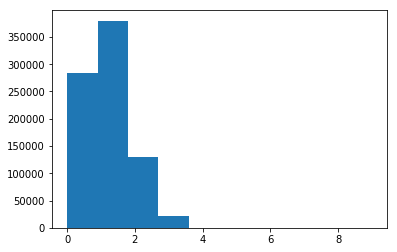

In [345]:
plt.hist(np.log1p(datos_sample["trip_distance"]))

In [346]:
PaymentType = datos_sample.groupby("payment_type")["key"].count().reset_index()
PaymentType.columns = ["payment_type","Cantidad"]
PaymentType["payment_type"] = PaymentType["payment_type"].replace(1,"Tarjeta Credito")
PaymentType["payment_type"] = PaymentType["payment_type"].replace(2,"Efectivo")
PaymentType["payment_type"] = PaymentType["payment_type"].replace(3,"Sin Cargo")
PaymentType["payment_type"] = PaymentType["payment_type"].replace(4,"Disputa")
PaymentType["payment_type"] = PaymentType["payment_type"].replace(5,"Desconocido")
PaymentType["payment_type"] = PaymentType["payment_type"].replace(6,"Viaje Vacio")

In [347]:
PaymentType

,payment_type,Cantidad
0,Tarjeta Credito,475160
1,Efectivo,338055
2,Sin Cargo,1380
3,Disputa,1011
4,Desconocido,17


<BarContainer object of 5 artists>

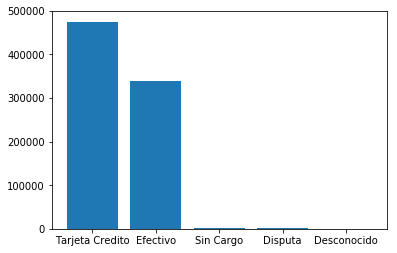

In [348]:
plt.bar(PaymentType["payment_type"],PaymentType["Cantidad"])

In [349]:
DayofWeek = datos_sample.groupby("dayofweek")["key"].count().reset_index()
DayofWeek.columns = ["dayofweek","Cantidad"]
DayofWeek["dayofweek"] = DayofWeek["dayofweek"].replace(0,"Lunes")
DayofWeek["dayofweek"] = DayofWeek["dayofweek"].replace(1,"Martes")
DayofWeek["dayofweek"] = DayofWeek["dayofweek"].replace(2,"Miercoles")
DayofWeek["dayofweek"] = DayofWeek["dayofweek"].replace(3,"Jueves")
DayofWeek["dayofweek"] = DayofWeek["dayofweek"].replace(4,"Viernes")
DayofWeek["dayofweek"] = DayofWeek["dayofweek"].replace(5,"Sabado")
DayofWeek["dayofweek"] = DayofWeek["dayofweek"].replace(6,"Domingo")

In [350]:
DayofWeek

,dayofweek,Cantidad
0,Lunes,107552
1,Martes,110762
2,Miercoles,113744
3,Jueves,118647
4,Viernes,129245
5,Sabado,129203
6,Domingo,106470


<BarContainer object of 7 artists>

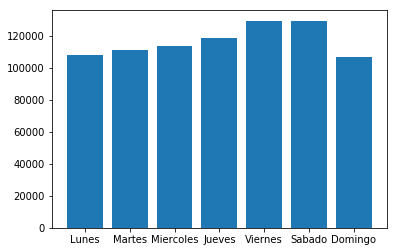

In [351]:
plt.bar(DayofWeek["dayofweek"],DayofWeek["Cantidad"])

In [352]:
DayofMonth = datos_sample.groupby("dayofmonth")["key"].count().reset_index()
DayofMonth.columns = ["dayofmonth","Cantidad"]

<BarContainer object of 31 artists>

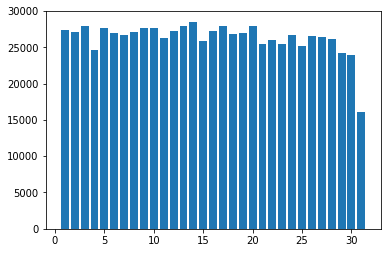

In [353]:
plt.bar(DayofMonth["dayofmonth"],DayofMonth["Cantidad"])

In [354]:
Month = datos_sample.groupby("month")["key"].count().reset_index()
Month.columns = ["month","Cantidad"]

<BarContainer object of 12 artists>

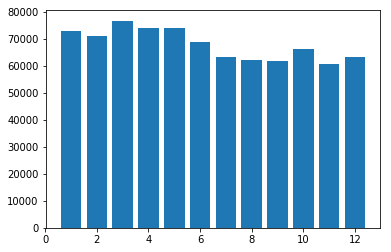

In [355]:
plt.bar(Month["month"],Month["Cantidad"])

In [356]:
Hora = datos_sample.groupby("hora_pickup")["key"].count().reset_index()
Hora.columns = ["hora_pickup","Cantidad"]

<BarContainer object of 24 artists>

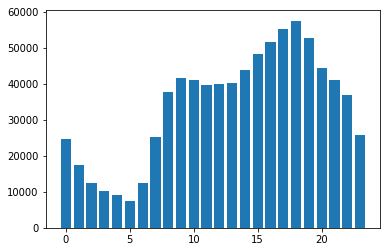

In [357]:
plt.bar(Hora["hora_pickup"],Hora["Cantidad"])

In [358]:
datos_sample["total_amount"].describe()

count    815623.000000
mean         16.306547
std          19.009365
min           5.000000
25%           8.800000
50%          12.300000
75%          19.300000
max       10528.750000
Name: total_amount, dtype: float64

(array([8.15621e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([5.000000e+00, 1.057375e+03, 2.109750e+03, 3.162125e+03,
        4.214500e+03, 5.266875e+03, 6.319250e+03, 7.371625e+03,
        8.424000e+03, 9.476375e+03, 1.052875e+04]),
 <a list of 10 Patch objects>)

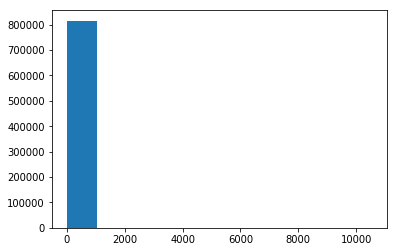

In [359]:
plt.hist(datos_sample["total_amount"])

In [360]:
datos_sample = datos_sample[datos_sample["total_amount"] >= 0]

(array([3.76684e+05, 3.20020e+05, 1.02875e+05, 1.58300e+04, 2.02000e+02,
        9.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00]),
 array([1.79175947, 2.53877951, 3.28579955, 4.03281959, 4.77983963,
        5.52685967, 6.27387971, 7.02089974, 7.76791978, 8.51493982,
        9.26195986]),
 <a list of 10 Patch objects>)

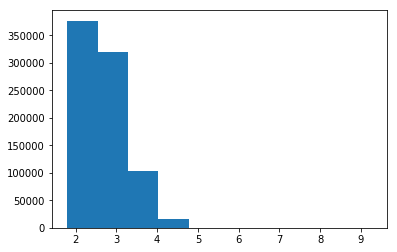

In [361]:
plt.hist(np.log1p(datos_sample["total_amount"]))

In [362]:
datos_sample = datos_sample[datos_sample["total_amount"] >= 5]

(array([5.51274e+05, 1.65953e+05, 5.45280e+04, 2.25370e+04, 1.15100e+04,
        6.06800e+03, 2.33000e+03, 8.11000e+02, 2.78000e+02, 1.37000e+02]),
 array([  5. ,  16.5,  28. ,  39.5,  51. ,  62.5,  74. ,  85.5,  97. ,
        108.5, 120. ]),
 <a list of 10 Patch objects>)

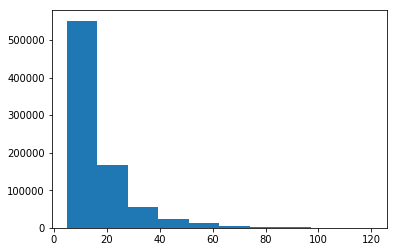

In [370]:
plt.hist((datos_sample["total_amount"]))

In [369]:
datos_sample = datos_sample[datos_sample["total_amount"] <= 120]

In [371]:
datos_sample2 = datos_sample[["key","VendorID","store_and_fwd_flag","RatecodeID","PULocationID","DOLocationID","passenger_count","trip_distance",
                              "payment_type","trip_type","total_amount","hora_pickup","dayofweek","dayofmonth","month","time_duration"]]
#"borough_pickup","borough_dropoff","zone_pickup","zone_dropoff"

In [372]:
datos_sample2.isnull().sum()

key                   0
VendorID              0
store_and_fwd_flag    0
RatecodeID            0
PULocationID          0
DOLocationID          0
passenger_count       0
trip_distance         0
payment_type          0
trip_type             0
total_amount          0
hora_pickup           0
dayofweek             0
dayofmonth            0
month                 0
time_duration         0
dtype: int64

# Escalando variables

In [373]:
from sklearn.preprocessing import RobustScaler
rbs = RobustScaler()

In [374]:
datos_sample2.columns

Index(['key', 'VendorID', 'store_and_fwd_flag', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'passenger_count', 'trip_distance', 'payment_type',
       'trip_type', 'total_amount', 'hora_pickup', 'dayofweek', 'dayofmonth',
       'month', 'time_duration'],
      dtype='object')

In [375]:
datos_sample2["key"] = range(datos_sample2.shape[0])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [376]:
X_num = datos_sample2.drop(["key","time_duration","total_amount"],axis = 1)
X_scaled = rbs.fit_transform(X_num)
X_scaled = pd.DataFrame(X_scaled)
X_scaled.columns = ['VendorID', 'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID', 'passenger_count', "trip_distance", 'payment_type',
                    'trip_type', 'hora_pickup', 'dayofweek', 'dayofmonth', 'month']

In [377]:
X_scaled["key1"] = range(X_scaled.shape[0])
X = X_scaled
y = datos_sample2["time_duration"]

(array([5.06267e+05, 1.91802e+05, 6.71360e+04, 2.73790e+04, 1.23270e+04,
        5.77500e+03, 2.75700e+03, 1.23700e+03, 5.27000e+02, 2.19000e+02]),
 array([ 181. ,  882.6, 1584.2, 2285.8, 2987.4, 3689. , 4390.6, 5092.2,
        5793.8, 6495.4, 7197. ]),
 <a list of 10 Patch objects>)

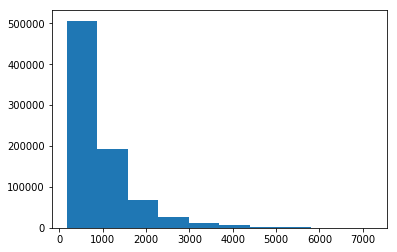

In [378]:
plt.hist(y)

# Particion train-test

In [379]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [380]:
Val_train = pd.DataFrame(X_train["key1"])
Val_test = pd.DataFrame(X_test["key1"])
X_train = X_train.drop("key1",axis = 1)
X_test = X_test.drop("key1",axis = 1)

In [381]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((570798, 13), (570798,), (244628, 13), (244628,))

# Comparacion de Modelos

**Modelo Regresion Lineal**

In [382]:
from sklearn.linear_model import LinearRegression
rl = LinearRegression()

In [383]:
mod_rl = rl.fit(X_train,y_train)

In [384]:
pred_rl = mod_rl.predict(X_test)

**Metricas**

In [385]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test,pred_rl),mean_squared_error(y_test,pred_rl)**(0.5)

(473892.62775732524, 688.3985965683873)

In [386]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test,pred_rl)

480.14430585119936

In [387]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_test,pred_rl)

75.86137929645473

In [388]:
# Correlation
def corr_test(y_true,y_pred):
    return np.corrcoef(y_true,y_pred)[0][1]

corr_test(y_test,pred_rl)

0.4687456181949108

**Modelo Lasso**

In [389]:
from sklearn.linear_model import Lasso
lasso_ = Lasso(alpha = 0.001)

In [390]:
mod_lasso = lasso_.fit(X_train,y_train)

In [391]:
pred_lasso = mod_lasso.predict(X_test)

**Metricas**

In [392]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test,pred_lasso),mean_squared_error(y_test,pred_lasso)**(0.5)

(473892.2237608881, 688.3983031362643)

In [393]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test,pred_lasso)

480.14385895615135

In [394]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_test,pred_lasso)

75.86134328568829

In [395]:
# Correlation
def corr_test(y_true,y_pred):
    return np.corrcoef(y_true,y_pred)[0][1]

corr_test(y_test,pred_lasso)

0.4687518997368702

**Modelo Rigde**

In [396]:
from sklearn.linear_model import Ridge
ridge_ = Ridge(alpha = 10000)

In [397]:
mod_ridge = ridge_.fit(X_train,y_train)

In [398]:
pred_ridge = mod_ridge.predict(X_test)

**Metricas**

In [399]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test,pred_ridge),mean_squared_error(y_test,pred_ridge)**(0.5)

(473794.3924658326, 688.3272422807574)

In [400]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test,pred_ridge)

479.9968469871862

In [401]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_test,pred_ridge)

75.94543356314821

In [402]:
# Correlation
def corr_test(y_true,y_pred):
    return np.corrcoef(y_true,y_pred)[0][1]

corr_test(y_test,pred_ridge)

0.4783605883772924

**Modelo GBM**

In [403]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor()

In [404]:
mod_gbm = gbm.fit(X_train,y_train)

In [405]:
pred_gbm = mod_gbm.predict(X_test)

**Metricas**

In [406]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test,pred_gbm),mean_squared_error(y_test,pred_gbm)**(0.5)

(130799.18581192466, 361.66170078116465)

In [407]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test,pred_gbm)

219.25292445866

In [408]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_test,pred_gbm)

25.117276475397375

In [409]:
# Correlation
def corr_test(y_true,y_pred):
    return np.corrcoef(y_true,y_pred)[0][1]

corr_test((y_test),(pred_gbm))

0.8810375283407103

**Modelo RandomForest**

In [410]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [411]:
mod_rf = rf.fit(X_train,y_train)

/home/michael/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [412]:
pred_rf = mod_rf.predict(X_test)

**Metricas**

In [413]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test,pred_rf),mean_squared_error(y_test,pred_rf)**(0.5)

(123617.04917397574, 351.5921631293504)

In [414]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test,pred_rf)

211.65964031392272

In [415]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_test,pred_rf)

24.119031258287187

In [416]:
# Correlation
def corr_test(y_true,y_pred):
    return np.corrcoef(y_true,y_pred)[0][1]

corr_test((y_test),(pred_rf))

0.8884972657431195

# Importancia de variables

In [417]:
feature_importances = pd.DataFrame(mod_rf.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance',ascending=False)

In [418]:
feature_importances

,importance
trip_distance,0.747702
hora_pickup,0.062045
DOLocationID,0.053475
PULocationID,0.042879
dayofmonth,0.029354
dayofweek,0.023401
month,0.022959
passenger_count,0.006081
payment_type,0.005146
VendorID,0.003278


In [419]:
Val_train.columns = ["key"]
Val_test.columns = ["key"]

datos_sample_train = datos_sample2.merge(Val_train)
datos_sample_test = datos_sample2.merge(Val_test)

In [420]:
datos_sample_train.shape,datos_sample_test.shape

((570798, 16), (244628, 16))

In [421]:
datos_sample_test["pred_time_duration"] = (pred_rf)

In [422]:
np.percentile(datos_sample_test["pred_time_duration"], np.arange(0, 100, 10)) # deciles

array([ 188.7 ,  329.1 ,  412.9 ,  503.5 ,  605.5 ,  726.6 ,  878.6 ,
       1076.19, 1357.3 , 1863.3 ])

In [430]:
range_pred_duration = []
for value in datos_sample_test["pred_time_duration"]:
    if value <= 320:
        range_pred_duration.append("1.[0 - 320]")
    elif value <= 400:
        range_pred_duration.append("2.[321 - 400]")
    elif value <= 485:
        range_pred_duration.append("3.[401 - 485]")
    elif value <= 585:
        range_pred_duration.append("4.[486 - 585]")
    elif value <= 700:
        range_pred_duration.append("5.[586 - 700]")
    elif value <= 850:
        range_pred_duration.append("6.[701 - 850]")
    elif value <= 1035:
        range_pred_duration.append("7.[851 - 1035]")
    elif value <= 1300:
        range_pred_duration.append("8.[1036 - 1300]")
    elif value <= 1780:
        range_pred_duration.append("9.[1301 - 1780]")
    else:
        range_pred_duration.append("10.[1701 - Mas]")

datos_sample_test["range_pred_time_duration"] = range_pred_duration

In [433]:
datos_sample_test["range_dif"] = np.abs(datos_sample_test["time_duration"] - datos_sample_test["pred_time_duration"])

In [434]:
datos_sample_test["perc_dif"] = datos_sample_test["range_dif"] / datos_sample_test["time_duration"]

In [435]:
datos_sample_test.head()

,key,VendorID,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,payment_type,trip_type,total_amount,hora_pickup,dayofweek,dayofmonth,month,time_duration,pred_time_duration,range_pred_time_duration,range_dif,perc_dif
0,0,2,0,1,97,17,1,1.73,1,1.0,9.96,17.0,5,10,2,445,526.3,4.[486 - 585],81.3,0.182697
1,6,2,0,1,33,33,1,0.72,2,1.0,6.30,6.0,0,19,3,366,931.8,7.[851 - 1035],565.8,1.545902
2,7,2,0,5,213,78,1,4.87,1,2.0,22.00,18.0,1,7,8,1309,369.6,2.[321 - 400],939.4,0.717647
3,9,1,0,1,145,100,3,4.90,1,1.0,33.95,9.0,0,30,4,2687,2830.4,10.[1701 - Mas],143.4,0.053368
4,12,2,0,1,223,7,1,1.01,2,1.0,7.30,17.0,0,29,1,304,998.1,7.[851 - 1035],694.1,2.283224


In [436]:
datos_sample_test["perc_dif"].describe()

count    244628.000000
mean          1.080724
std           1.587205
min           0.000000
25%           0.303398
50%           0.592079
75%           1.025268
max          26.951630
Name: perc_dif, dtype: float64

In [431]:
datos_sample_test.groupby("range_pred_time_duration")["total_amount"].count()

range_pred_time_duration
1.[0 - 320]        21790
10.[1701 - Mas]    27437
2.[321 - 400]      23528
3.[401 - 485]      23380
4.[486 - 585]      24599
5.[586 - 700]      24041
6.[701 - 850]      25243
7.[851 - 1035]     24052
8.[1036 - 1300]    24887
9.[1301 - 1780]    25671
Name: total_amount, dtype: int64

In [432]:
datos_sample_test.groupby("range_pred_time_duration")["total_amount"].sum()

range_pred_time_duration
1.[0 - 320]        353945.53
10.[1701 - Mas]    443936.89
2.[321 - 400]      379542.57
3.[401 - 485]      379870.27
4.[486 - 585]      400134.75
5.[586 - 700]      391667.84
6.[701 - 850]      407931.31
7.[851 - 1035]     394972.85
8.[1036 - 1300]    405267.16
9.[1301 - 1780]    414162.55
Name: total_amount, dtype: float64

In [250]:
datos_sample_test["pred_time_duration"].describe()

count    244823.000000
mean        911.022743
std         684.418868
min         193.488788
25%         438.342845
50%         699.425435
75%        1150.035563
max       15343.468646
Name: pred_time_duration, dtype: float64

# Graficando las zonas

In [46]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pysal as ps

/usr/local/lib/python3.6/dist-packages/pysal/model/spvcm/abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


In [47]:
import shapefile as shp

sf = shp.Reader("/home/michael/Kschool/TFM/Importe_Taxi/taxi_zones/taxi_zones.shp")

In [48]:
def plot_map(sf, x_lim = None, y_lim = None, figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
    plt.figure(figsize = figsize)
    id=0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, id, fontsize=10)
        id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

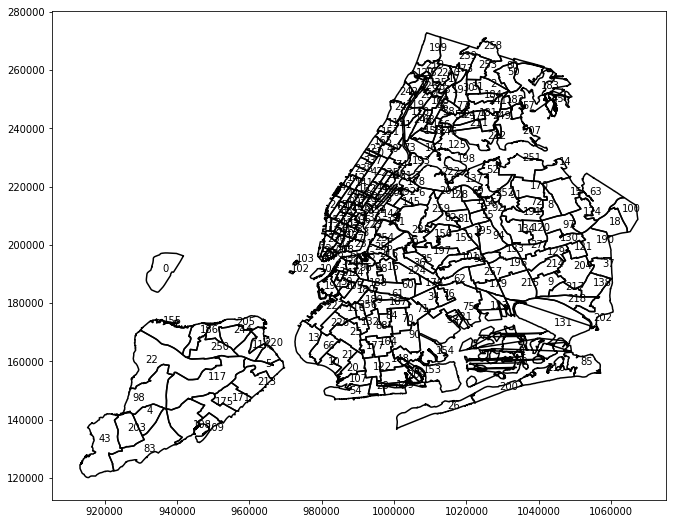

In [49]:
plot_map(sf)

In [50]:
def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' 
    column holding the geometry information. This uses the pyshp
    package
    """
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]

    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)

    return df

In [51]:
import seaborn as sns

def calc_color(data, color=None):
    if color   == 1: 
        color_sq =  ['#dadaebFF','#bcbddcF0','#9e9ac8F0', '#807dbaF0','#6a51a3F0','#54278fF0']; 
        colors = 'Purples';
    elif color == 2:
        color_sq = ['#c7e9b4','#7fcdbb','#41b6c4', '#1d91c0','#225ea8','#253494']; 
        colors = 'YlGnBu';
    elif color == 3: 
        color_sq = ['#f7f7f7','#d9d9d9','#bdbdbd', '#969696','#636363','#252525']; 
        colors = 'Greys';
    elif color == 9: 
        color_sq = ['#ff0000','#ff0000','#ff0000', '#ff0000','#ff0000','#ff0000']
    else:
        color_sq = ['#ffffd4','#fee391','#fec44f', '#fe9929','#d95f0e','#993404'];        
        colors = 'YlOrBr';
    new_data, bins = pd.qcut(data, 6, retbins=True, labels=list(range(6)))
    color_ton = []
    for val in new_data:
        color_ton.append(color_sq[val]) 
    if color != 9:
        colors = sns.color_palette(colors, n_colors=6)
        sns.palplot(colors, 0.6);
    for i in range(6):
        print ("\n"+str(i+1)+': '+str(int(bins[i]))+" => "+str(int(bins[i+1])-1), end =" ")
        print("\n\n   1   2   3   4   5   6")    
        return color_ton, bins;

In [52]:
def plot_map_fill_multiples_ids_tone(sf, title, comuna,  
                                     print_id, color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
        
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)
    
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
            
    for id in comuna:
        shape_ex = sf.shape(id)
        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        ax.fill(x_lon,y_lat, color_ton[comuna.index(id)])
        if print_id != False:
            x0 = np.mean(x_lon)
            y0 = np.mean(y_lat)
            plt.text(x0, y0, id, fontsize=10)
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

In [53]:
def plot_comunas_data(sf, title, comunas, data=None, 
                      color=None, print_id=False):
    '''
    Plot map with selected comunes, using specific color
    '''
    
    color_ton, bins = calc_color(data, color)
    df = read_shapefile(sf)
    comuna_id = []
    for i in comunas:
        comuna_id.append(df[df.zone == i].index.get_values()[0])
    plot_map_fill_multiples_ids_tone(sf, title, comuna_id, 
                                     print_id, 
                                     color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (11,9));

In [54]:
df = read_shapefile(sf)

In [56]:
df.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,coords
0,1,0.116357,0.000782,Newark Airport,1,EWR,"[(933100.9183527103, 192536.08569720192), (933..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"[(1033269.2435912937, 172126.0078125), (103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"[(1026308.7695066631, 256767.6975403726), (102..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"[(992073.4667968601, 203714.07598876953), (992..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"[(935843.3104932606, 144283.33585065603), (936..."



1: 0 => -1 

   1   2   3   4   5   6


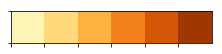

<Figure size 792x648 with 0 Axes>

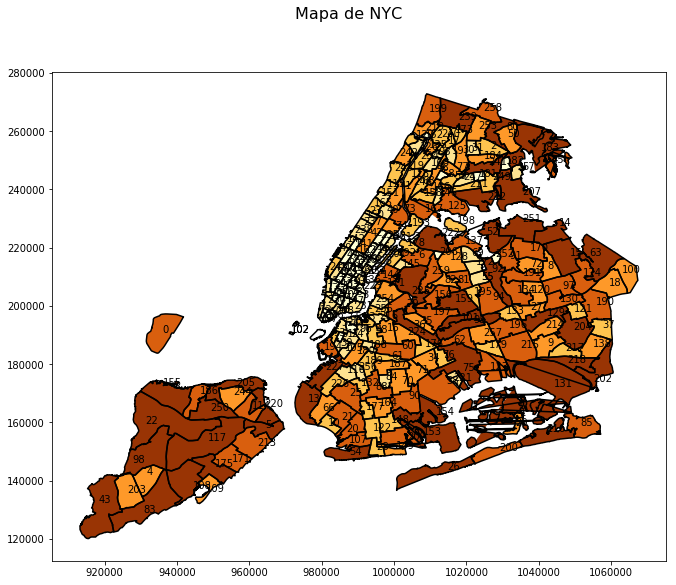

In [55]:
title = "Mapa de NYC"
names = list(df["zone"])
data = list(df["Shape_Leng"])

plot_comunas_data(sf,title,names, data, 4, True)

In [28]:
import json # or import geojson
with open("/home/michael/Kschool/TFM/Importe_Taxi/NYC_Taxi_Zones.geojson") as json_file:
    json_data = json.load(json_file)

In [76]:
geometry = []
for element in list(json_data.values())[1]:
    geometry.append(element["geometry"])

In [57]:
datos_map.head()

,coordinates,type
0,"[[[[-74.18445299999996, 40.694995999999904], [...",MultiPolygon
1,"[[[[-73.82337597260663, 40.63898704717672], [-...",MultiPolygon
2,"[[[[-73.84792614099985, 40.87134223399991], [-...",MultiPolygon
3,"[[[[-73.97177410965318, 40.72582128133706], [-...",MultiPolygon
4,"[[[[-74.17421738099989, 40.5625680859999], [-7...",MultiPolygon


In [86]:
datos_map = geometry[0]

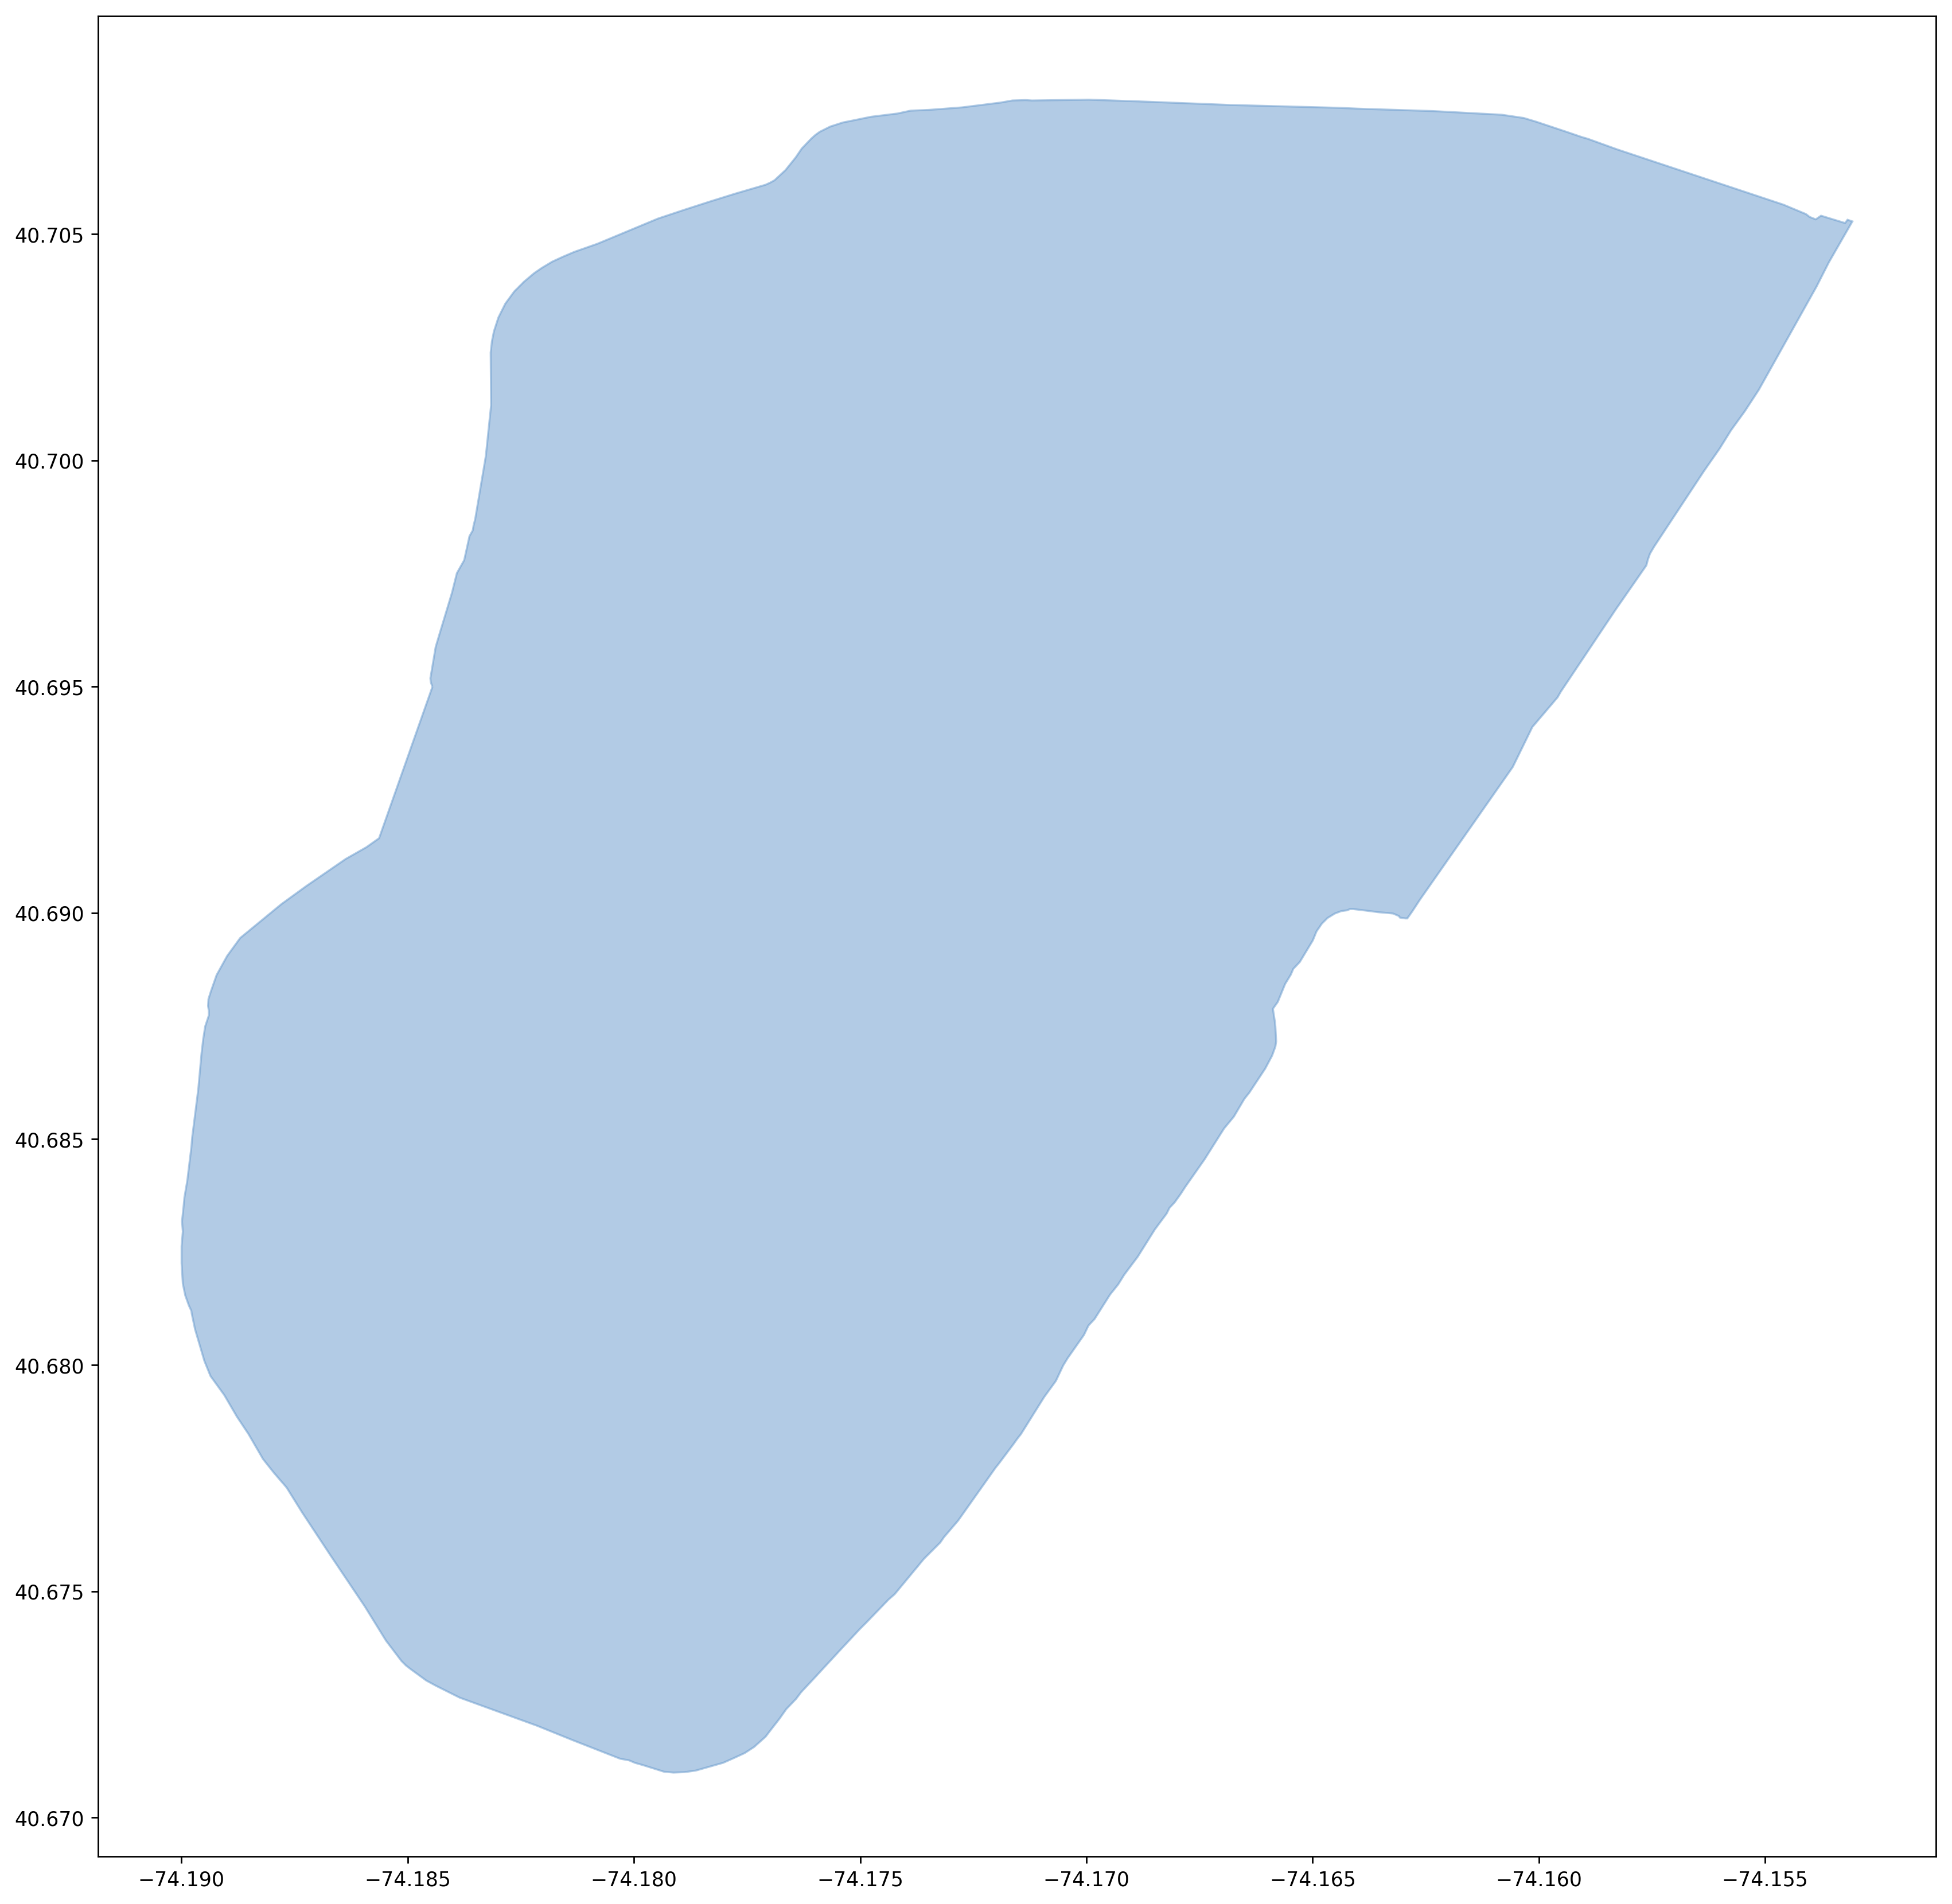

In [87]:
from descartes import PolygonPatch
BLUE = '#6699cc'
fig = plt.figure()
ax = fig.gca()
ax.add_patch(PolygonPatch(datos_map, fc=BLUE, ec=BLUE, alpha=0.5, zorder=2 ))
ax.axis('scaled')
plt.show()